In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [2]:
print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [5]:
import numpy as np
print(breast_cancer.target)
print(breast_cancer.target_names)
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

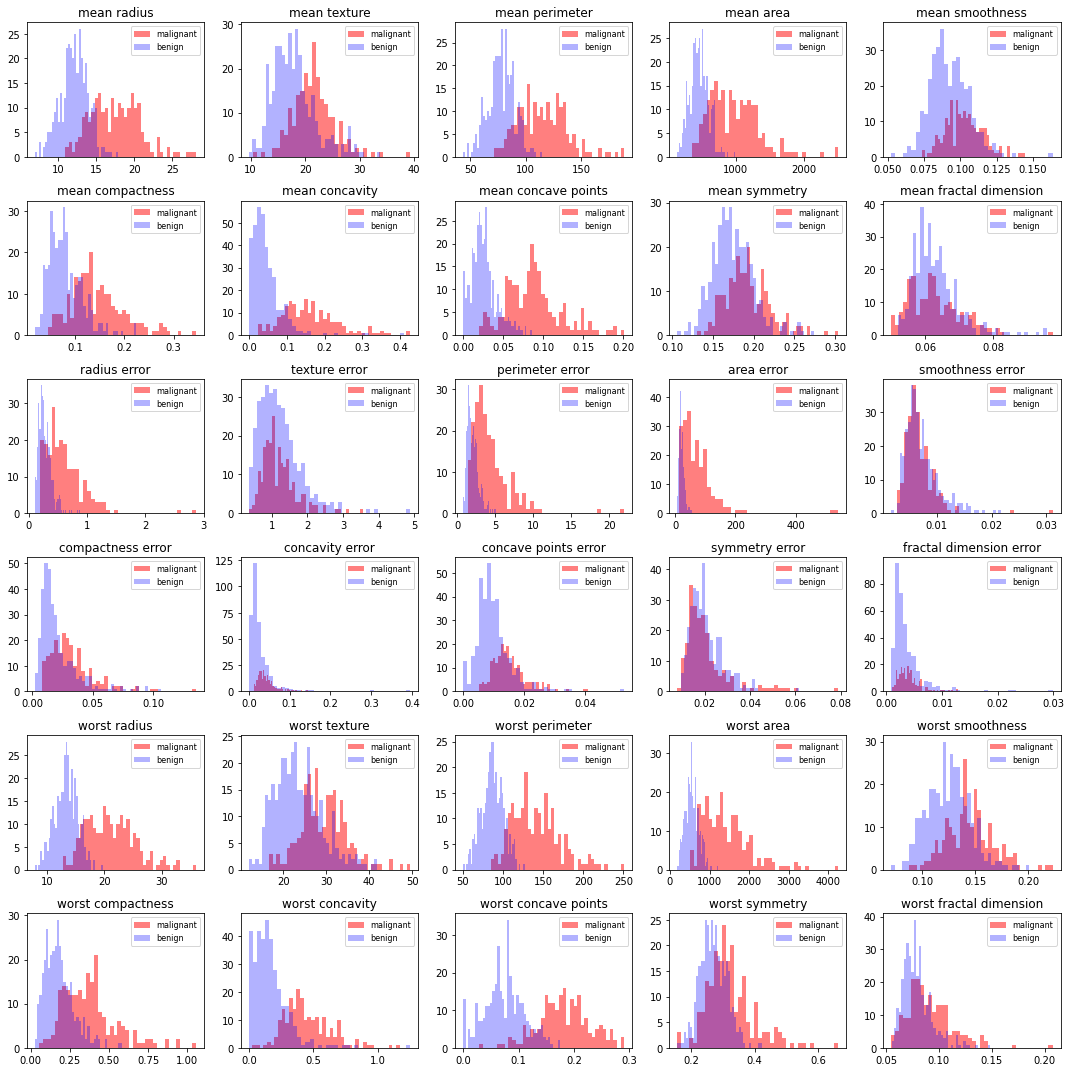

In [6]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(6,5, figsize=(15,15))

malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]

ax = axes.ravel() #flatten the 2D array

for i in range(30): #for each of the 30 features
  bins = 40

  #--plot histogram for each feature---
  ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
  ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)

  #--set the title---
  ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)

  #--display the legend---
  ax[i].legend(['malignant', 'benign'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

As we can see from the histogram plots above is that features such as 'mean radius' contributes directly to affecting the target (diagnosis - malignant / benign).  On the other hand, the 'smoothness error' feature doesn't really tell you whether a tumor is malignant or benign.

In [9]:
import pandas as pd

df = pd.DataFrame(breast_cancer.data,
                  columns=breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Let's use Logistic Regression using all 30 features in the dataset to train the model.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#--perform a split--
random_state = 12
X_train, X_test, Y_train, Y_test = \
  train_test_split(X, Y, test_size = 0.3,
                   shuffle = True, 
                   random_state=random_state)
#--train the model using logistic regression--
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, Y_train)

#--evaluate the model--
log_reg.score(X_test, Y_test)

0.9239766081871345

# Now let's train the model using Reduced Features (aka with the most important features)

The reason we reduce dimensionality (aka number of features) is because high dimensionality usually accounts for multi-collinearity, which leads to overfitting / slow-running models.

The aim is to reduce the number of features and see if the accuracy of the model can be improved.

# Getting the correlation factors


In [19]:
df_corr = df.corr(method='pearson')['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

Above, we used the `.corr()` function to get the correlation of each feature with respect to the target (diagnosis - malignant / benign).

By default, the `.corr()` function takes `method='pearson'` as the correlating coefficient. Refer to [this](https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20relationship%20between%20two%20variables.&text=When%20one%20variable%20changes%2C%20the,changes%20in%20the%20same%20direction.) for more details.

We then use `abs()` because the correlation between the feature and target can be negative (distance).

In [20]:
# get all the features that has at least 0.6 in correlation to
# the target
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features # without the 'diagonosis' column

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

We then extract all those features that have relatively high correlation to the target (we arbitrarily set the threshold to $0.6$)

# Checking for Multi-Collinearity

In [21]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):
  vif, tolerance = {}, {}

  # all the features that you want to examine
  for feature in features:
    # extract all the other features you will regress against
    X = [f for f in features if f != feature]
    X, Y = df[X], df[feature]

    # extract r-squared from the fit
    r2 = LinearRegression().fit(X, Y).score(X, Y)

    # calculate tolerance
    tolerance[feature] = 1 - r2

    # calculate VIF
    vif[feature] = 1/(tolerance[feature])
  # return VIF DataFrame
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

calculate_vif(df, features)

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


Our aim is to remove those features that have VIF greater than 5. We call the `calculate_vif()` function with different features until we have a feature-set that has all VIF values lesser than 5.

In [24]:
# try to reduce those features that have high VIF until each feature
# has VIF less than 5
features = [
    'worst concave points',
    'mean radius',
    'mean concavity',
]
calculate_vif(df, features)

,VIF,Tolerance
worst concave points,4.759243,0.210117
mean radius,2.266584,0.441193
mean concavity,3.917617,0.255257


# Training the Model
Now that we've selected the top 3 features, we can train the model using logistic regression

In [26]:
from sklearn.model_selection import train_test_split

X = df.loc[:, features] # get the reduced features in the dataframe

Y = df.loc[:, 'diagnosis']

# perform a split
X_train, X_test, Y_train, Y_test = \
  train_test_split(X, Y,
                   test_size=0.3,
                   shuffle=True,
                   random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)

0.847953216374269

# Training the Model using Reduced Features (PCA)!!

Remember that PCA is sensitive to scaling. So the first step is to perform a standard scaling on all the features.

In [27]:
from sklearn.preprocessing import StandardScaler

# get the features and label from the original dataframe
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Applying the Principal Component Analysis (PCA)
We can now apply PCA to the features using the `PCA` class in the `sklearn.decomposition` module.

In [28]:
from sklearn.decomposition import PCA

components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

The initializer of the PCA class has a parameter named n_components. You can supply it one of the following values:


*   an integer to indicate how many principal components you want to reduce the features to.

*   a floating-point number between $0<n<$ and it will return the number of components needed to capture the specified percentage of variability in the data. For example, if you want to find the number of components needed to capture $85\%$ of the variability of the data, pass `0.85` to the `n_components` parameter.
*   `None`. In this case, the number of components returned will be the same as the number of original features in the dataset


In [29]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



We can see from the above result that:
* The first component alone captures about $44\%$ variability in the data.
* The second one captures about $19\%$ variability in the data and so on.
* The components altogether capture $100\%$ variability in the data

In [30]:
# A much easier way to understand the above result is to print 
# the cumulative variances:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



You can now interpret the cumulative variances as follows:

* The first component alone captures about $44\%$ variability in the data
* The first two components capture about $63\%$ variability in the data and so on.
* The first $8$ components together capture about $92.6\%$ variability in the data.

A visual way to view the cumulative variances is to plot a scree plot.

A **scree plot** is a line plot of the principal components.

Text(0, 0.5, 'Explained variance (%)')

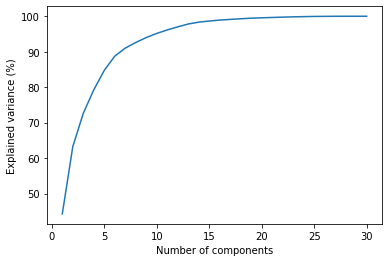

In [31]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
  if components is None else components

plt.plot(range(1, components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Now let's apply PCA to find the desired number of components based on the desired explained variance, say $80\%$

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

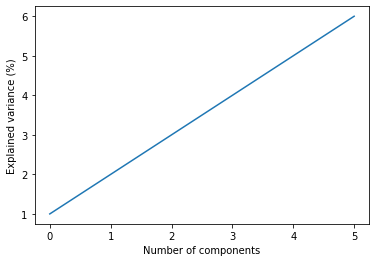

In [33]:
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1))
np.cumsum(pca.explained_variance_ratio_ * 100)
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

We can find out the importance of each feature that contributes to each of the components using the `components_` attribute of the `pca` object:

In [34]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

Here we see the importance of each feature and the higher the magnitude, the higher the importance.

For fun, the top $4$ features that contributes the most to each of the $6$ components:

In [37]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
  # get the indices of the top 4 values in each row
  temp = np.argpartition(-(pca_components[row]), 4)

  # sort the indices in descending order
  indices = temp[np.argsort((-pca_components[row])[temp])][:4]

  # print the top 4 feature names
  print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


# Transforming 30 columns to 6 principal components


In [38]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


# Creating a Machine Learning Pipeline to formalize the entire process

In [39]:
from sklearn.pipeline import Pipeline

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()

log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

Now, we do the classic thing -- split the dataset into training and testing sets and train the model using the training set:

In [40]:
# perform a split
X_train, X_test, Y_train, Y_test = \
  train_test_split(X, Y,
                   test_size = 0.3,
                   shuffle=True,
                   random_state = random_state)
  
# train the model using the PCA components
log_regress_model.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

And let's score teh model to see how it performs:

In [41]:
log_regress_model.score(X_test, Y_test)

0.9707602339181286